<a href="https://colab.research.google.com/github/fitrimutmainah/UTS-Analitik-Teks-25-Mei/blob/main/UTS_Analitik_25_Mei_2025_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pengumpulan data

In [ ]:
import pandas as pd

# Load dataset
fake_df = pd.read_csv('/content/Fake.csv')
real_df = pd.read_csv('/content/True.csv')

# Tambahkan label
fake_df['label'] = 'fake'
real_df['label'] = 'real'

# Gabungkan dataset
df = pd.concat([fake_df, real_df], ignore_index=True)
print(df.shape)
df.head()


(44898, 5)


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


 https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

 Fitur:

title: Judul artikel
text: Isi artikel
label: Kategori berita (fake / real)

In [ ]:
#pre processing

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Fungsi pre-processing
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Hapus tanda baca
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(preprocess)

# Contoh before-after
print("Before:\n", df['text'][0])
print("\nAfter:\n", df['clean_text'][0])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Before:
 Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency 

In [ ]:
#TF - IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['clean_text'])

In [ ]:
# Install gensim library
!pip install gensim


In [ ]:
# Install gensim library
!pip install --upgrade numpy
!pip install --upgrade --force-reinstall gensim

#Word2Vec
from gensim.models import Word2Vec

tokens = df['clean_text'].apply(lambda x: x.split())
model_w2v = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=5)

model_w2v.wv.most_similar('news')

  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.m

[('newsit', 0.7410454154014587),
 ('newsmeanwhil', 0.6788527369499207),
 ('newss', 0.6421667337417603),
 ('newsth', 0.6053891181945801),
 ('newswatch', 0.6018111109733582),
 ('newsthi', 0.5935505032539368),
 ('newstrump', 0.5688966512680054),
 ('newsher', 0.5639408230781555),
 ('press', 0.5523638129234314),
 ('newsand', 0.5502446293830872)]

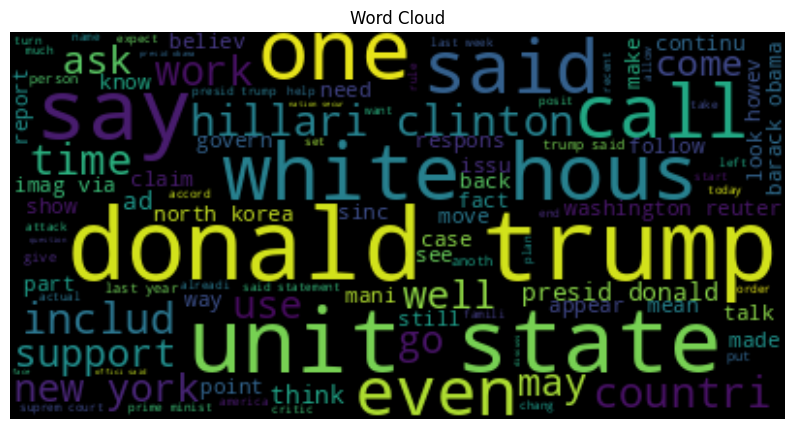

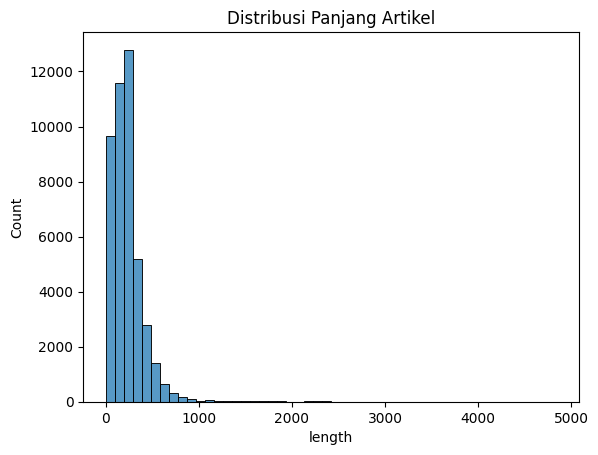

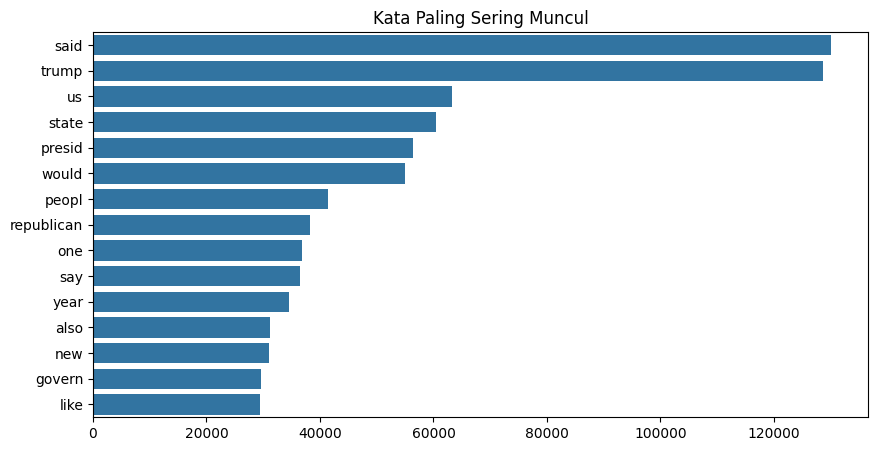

In [ ]:
#EDA & Visualisasi
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Wordcloud
text_all = ' '.join(df['clean_text'])
wordcloud = WordCloud(max_words=100).generate(text_all)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

# Distribusi panjang teks
df['length'] = df['clean_text'].apply(lambda x: len(x.split()))
sns.histplot(df['length'], bins=50)
plt.title('Distribusi Panjang Artikel')
plt.show()

# Kata paling umum
from collections import Counter
counts = Counter(text_all.split())
common = counts.most_common(15)
words, freqs = zip(*common)

plt.figure(figsize=(10,5))
sns.barplot(x=list(freqs), y=list(words))
plt.title("Kata Paling Sering Muncul")
plt.show()


In [ ]:
#Klasifikasi Teks
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Target
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Evaluasi
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        fake       0.92      0.94      0.93      4733
        real       0.93      0.91      0.92      4247

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980

